In [7]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
!pip install kneed

# Exercise 1: Clustering Method

In this exercise we will explore how each clustering algorithm discussed in the class works. 

## Load Dataset

The dataset that we will use is a customer transaction in a certain mall. In this dataset there will 4 features including Gender, Age, Annual Income, and Spending Score. You can get the dataset from https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Mall_Customers.csv

In [8]:
# load dataset and show the first five sample
url = "https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Mall_Customers.csv"
df = pd.read_csv(url)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
description = df.describe()
description

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Data Preprocessing

For this case study, we only use income and spending score 

In [10]:
df = pd.read_csv(url)
new_df = df[["Annual Income (k$)", "Spending Score (1-100)"]]
new_df.head()


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Before we analyze our data, we need to scale the data with standardization method

In [11]:
data_to_scale = df[["Annual Income (k$)", "Spending Score (1-100)"]]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_to_scale)
scaled_df = pd.DataFrame(scaled_data, columns=["income", "spending"])
scaled_df.head()

,income,spending
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


In [12]:
data_to_scale = df[["Annual Income (k$)", "Spending Score (1-100)"]]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_to_scale)
scaled_df = pd.DataFrame(scaled_data, columns=["income", "spending"])
description = scaled_df.describe()
description

,income,spending
count,2.000000e+02,2.000000e+02
mean,-6.128431e-16,-1.121325e-16
std,1.002509e+00,1.002509e+00
min,-1.738999e+00,-1.910021e+00
25%,-7.275093e-01,-5.997931e-01
50%,3.587926e-02,-7.764312e-03
75%,6.656748e-01,8.851316e-01
max,2.917671e+00,1.894492e+00


Then, we check the inisial position for our sample. You may use pairplot or scattered chart for the visualization option.

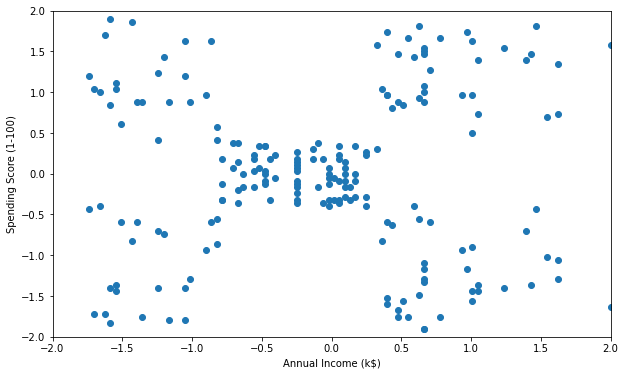

In [18]:
data_to_scale = df[["Annual Income (k$)", "Spending Score (1-100)"]]

scaler = StandardScaler()

scaled_data = scaler.fit_transform(data_to_scale)

scaled_df = pd.DataFrame(scaled_data, columns=["Annual Income (k$)", "Spending Score (1-100)"])

plt.figure(figsize=(10, 6))
plt.scatter(scaled_df["Annual Income (k$)"], scaled_df["Spending Score (1-100)"])
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")

plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.show()


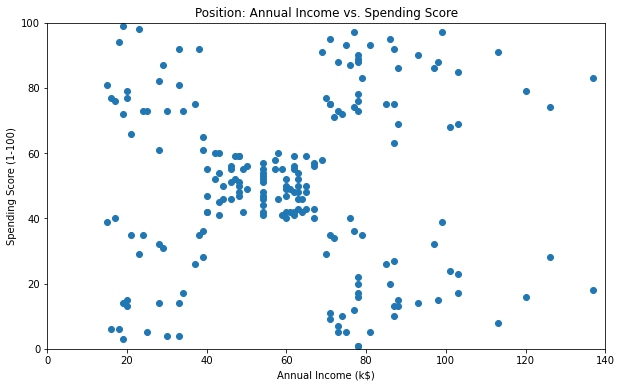

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"])
plt.title("Position: Annual Income vs. Spending Score")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")

plt.xlim(0, 140)
plt.ylim(0, 100)

plt.show()

## Clustering

### K-Means Algorithm

For using KMeans clustering algorithm, you need to define the number of cluster, initialization number, number of iteration, and random state.

In this case study, the below parameter settings is used:
- centroid initialization: random
- number of cluster: 5
- number of iteration: 300
- random state: 42

In [25]:
from sklearn.cluster import KMeans
data = df[["Annual Income (k$)", "Spending Score (1-100)"]]

n_clusters = 5
init = 'random'
max_iter = 300
random_state = 37

kmeans = KMeans(n_clusters=n_clusters, init=init, max_iter=max_iter, random_state=random_state)
df["Cluster"] = kmeans.fit_predict(data)

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,1
2,3,Female,20,16,6,3
3,4,Female,23,16,77,1
4,5,Female,31,17,40,3


Visualize your result based on income and spending. You also can show the final position of the centroid.

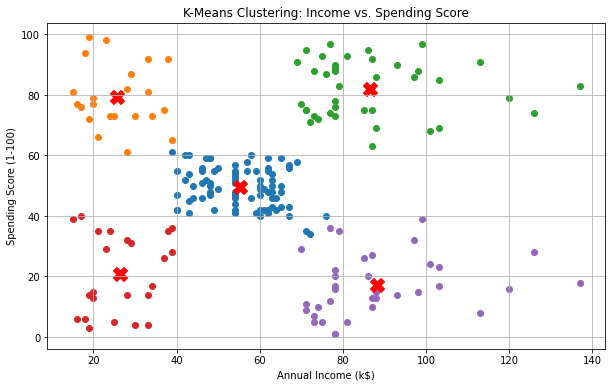

In [27]:
# visualize the result using scater chart
centroids = kmeans.cluster_centers_
plt.figure(figsize=(10, 6))
for cluster in range(n_clusters):
    plt.scatter(df[df["Cluster"] == cluster]["Annual Income (k$)"], 
                df[df["Cluster"] == cluster]["Spending Score (1-100)"], label=f'Cluster {cluster + 1}')

plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')

plt.title("K-Means Clustering: Income vs. Spending Score")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.grid(True)


plt.show()

The evaluation for chosing the number of K in KMEANS can be done by several methods such as elbow method and silhouette score

1. using elbow method

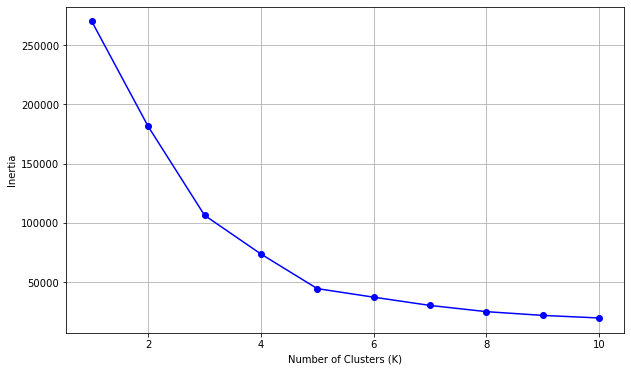

In [34]:
from sklearn.cluster import KMeans
data = df[["Annual Income (k$)", "Spending Score (1-100)"]]

inertia = []

# set the parameter for evaluating K
K_range = range(1, 11)

# check the inertia for each K
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

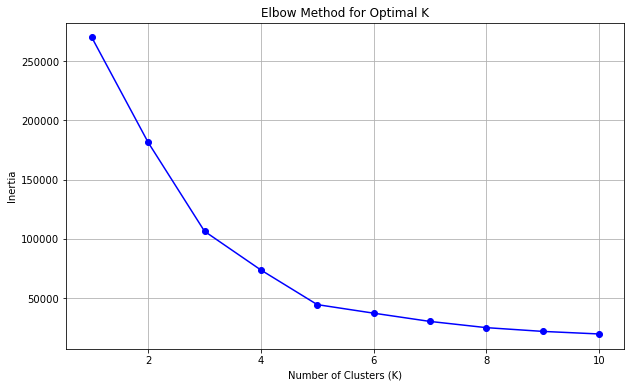

In [37]:
# manually visualize the elbow method using plotlib
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, marker='o', linestyle='-', color='b')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.grid(True)

plt.show()

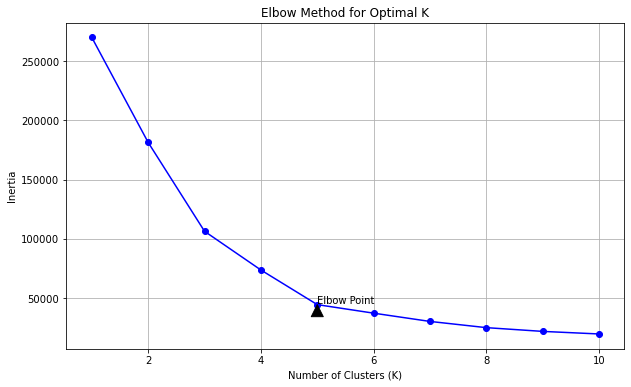

In [41]:
from kneed import KneeLocator

# using kneelocator to find the elbow/knee
kneedle = KneeLocator(list(K_range), inertia, curve='convex', direction='decreasing')

plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, marker='o', linestyle='-', color='b')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.grid(True)

plt.annotate("Elbow Point", xy=(kneedle.elbow, kneedle.elbow_y), xytext=(kneedle.elbow, kneedle.elbow_y + 1000),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()
